In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [22]:
data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
data = data.drop(['Id'], axis=1)
data = data.drop_duplicates(subset=['ProductId','UserId', 'Summary','Text'], keep="last")
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [23]:
data = data.drop(['ProductId', 'UserId', 'ProfileName', 'Time'], axis=1)
data.info()
data['review'] = data.apply(lambda x: 1 if x['Score']>=3 else 0, axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567556 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   HelpfulnessNumerator    567556 non-null  int64 
 1   HelpfulnessDenominator  567556 non-null  int64 
 2   Score                   567556 non-null  int64 
 3   Summary                 567529 non-null  object
 4   Text                    567556 non-null  object
dtypes: int64(3), object(2)
memory usage: 26.0+ MB


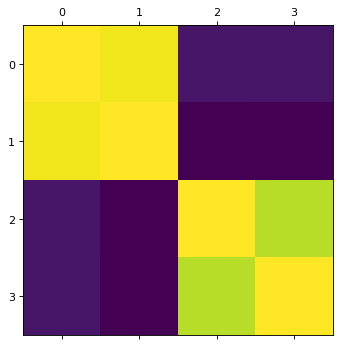

In [24]:
df = data.drop(['Summary', 'Text'], axis=1)
corr = df.corr()
plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.show()

In [25]:
data = data.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score'], axis=1)
data

,Summary,Text,review
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,Cough Medicine,If you are looking for the secret ingredient i...,0
4,Great taffy,Great taffy at a great price. There was a wid...,1
...,...,...,...
568449,Will not do without,Great for sesame chicken..this is a good if no...,1
568450,disappointed,I'm disappointed with the flavor. The chocolat...,0
568451,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
568452,Favorite Training and reward treat,These are the BEST treats for training and rew...,1


In [26]:
data['Summary'] = data['Summary'].fillna('')

In [27]:
data2 = data.copy()

def add(row):
    return row['Summary'] + " " + row['Text']

In [28]:
data2['combined'] = data2.apply(add, axis=1)
data2 = data2.drop(['Summary', 'Text'], axis=1)
data2.head()

,review,combined
0,1,Good Quality Dog Food I have bought several of...
1,0,Not as Advertised Product arrived labeled as J...
2,1,"""Delight"" says it all This is a confection tha..."
3,0,Cough Medicine If you are looking for the secr...
4,1,Great taffy Great taffy at a great price. The...


In [29]:
# import string
# chars = string.punctuation
chars = 'abcdefghijklmnopqrstuvwxyz '
def removePunctuation(row):
    x = row['combined']
    x = x.lower()
    y = ''
    for c in x:
        if c in chars:
            y = y + c
    return y

In [30]:
data2['combined'] = data2.apply(removePunctuation, axis=1)
data2.head()

,review,combined
0,1,good quality dog food i have bought several of...
1,0,not as advertised product arrived labeled as j...
2,1,delight says it all this is a confection that ...
3,0,cough medicine if you are looking for the secr...
4,1,great taffy great taffy at a great price ther...


In [31]:
data2['tokens'] = data2.apply(lambda x: x['combined'].split(), axis=1)
data2.head()

,review,combined,tokens
0,1,good quality dog food i have bought several of...,"[good, quality, dog, food, i, have, bought, se..."
1,0,not as advertised product arrived labeled as j...,"[not, as, advertised, product, arrived, labele..."
2,1,delight says it all this is a confection that ...,"[delight, says, it, all, this, is, a, confecti..."
3,0,cough medicine if you are looking for the secr...,"[cough, medicine, if, you, are, looking, for, ..."
4,1,great taffy great taffy at a great price ther...,"[great, taffy, great, taffy, at, a, great, pri..."


In [32]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [33]:
lemmatizer = WordNetLemmatizer()

def lemmatize(row):
    lem_words = []
    words = row['tokens']
    for word in words:
        word = lemmatizer.lemmatize(word, 'v')
        lem_words.append(word)
    return lem_words

data2['combined'] = data2.apply(lemmatize, axis=1)
data2.head()

,review,combined,tokens
0,1,"[good, quality, dog, food, i, have, buy, sever...","[good, quality, dog, food, i, have, bought, se..."
1,0,"[not, as, advertise, product, arrive, label, a...","[not, as, advertised, product, arrived, labele..."
2,1,"[delight, say, it, all, this, be, a, confectio...","[delight, says, it, all, this, is, a, confecti..."
3,0,"[cough, medicine, if, you, be, look, for, the,...","[cough, medicine, if, you, are, looking, for, ..."
4,1,"[great, taffy, great, taffy, at, a, great, pri...","[great, taffy, great, taffy, at, a, great, pri..."


In [34]:
data2 = data2.drop(['tokens'], axis=1)
data2_pos = data2[data2['review']==1]
data2_neg = data2[data2['review']==0]

In [35]:
data2_pos.head()

,review,combined
0,1,"[good, quality, dog, food, i, have, buy, sever..."
2,1,"[delight, say, it, all, this, be, a, confectio..."
4,1,"[great, taffy, great, taffy, at, a, great, pri..."
5,1,"[nice, taffy, i, get, a, wild, hair, for, taff..."
6,1,"[great, just, as, good, as, the, expensive, br..."


In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
data2_pos.isna().sum()

review      0
combined    0
dtype: int64

In [38]:
data2_neg.isna().sum()

review      0
combined    0
dtype: int64

In [39]:
def generateText(df):
    text = ''
    for words in df['combined']:
        for word in words:
            text = text + word + " "
        
    return text

In [40]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(generateText(data2_pos))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

KeyboardInterrupt: 

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(generateText(data2_neg))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()